<a href="https://www.kaggle.com/code/adelinmil/data-centric-way-eda-outliers-fs?scriptVersionId=141542356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)


from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 20)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM

import math
import scipy.stats as ss

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s3e21/sample_submission.csv')

data.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,0.650,14.515,5.845,1.285,0.429,0.030,0.050,0.064,0.730,1.075,0.056,0.567,0.400,1.500,1.560,19.355,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,1.848,8.625,12.175,0.280,0.440,0.089,1.360,0.064,0.902,1.454,0.056,0.190,2.347,5.105,2.095,19.355,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,0.650,17.144,24.645,0.380,0.440,0.060,0.050,0.082,0.902,2.025,0.056,0.567,1.700,1.700,3.960,4.900,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,1.730,3.870,8.410,1.480,1.380,0.050,0.050,0.070,0.530,1.740,0.050,0.064,1.500,1.500,2.020,3.960,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,0.650,3.850,5.845,0.280,0.440,0.105,0.115,0.074,1.252,1.075,0.071,0.190,1.050,1.150,2.095,3.902,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


## EDA

In [3]:
# report = ProfileReport(df = sample_submission, title = 'Dissolved-oxygen-prediction-in-river-waters-report')

# report.to_file('Dissolved-oxygen-prediction-in-river-waters-report.html')

## Baseline

In [4]:
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

In [5]:
X, y = data.drop('target', axis = 1), data.target

scores = cross_val_score(rf, 
                         X, 
                         y,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'RMSE Mean (BASELINE): {scores.mean()}, Standard Deviation: {scores.std()}')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RMSE Mean (BASELINE): -1.3770624373999154, Standard Deviation: 0.639966615607941


## Clipping

In [6]:
#clipping
data.target = data.target.clip(lower = 7, upper = 20)

## Outliers Detection

In [7]:
svm = SGDOneClassSVM(nu=0.55)
yhat = svm.fit_predict(data.drop('id', axis = 1))

print('Outliers detected (SGD One Class SVM): {}'.format(np.count_nonzero(yhat == -1)))

mask = yhat != -1
data_SVM = data.loc[mask, :].reset_index(drop = True)

X_SVM, Y_SVM = data_SVM.drop('target', axis = 1), data_SVM.target

scores = cross_val_score(rf, 
                         X_SVM,
                         Y_SVM,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'[{svm.__class__.__name__}] --> RMSE Mean: {scores.mean()}, Standard Deviation: {scores.std()}')

Outliers detected (SGD One Class SVM): 18
[SGDOneClassSVM] --> RMSE Mean: -0.9838888578992352, Standard Deviation: 0.1029938971214532


In [8]:
iso = IsolationForest(random_state = 0)
yhat = iso.fit_predict(data_SVM.drop('id', axis = 1))

print('Outliers detected (Isolation Forest): {}'.format(np.count_nonzero(yhat == -1)))

mask = yhat != -1
data_ISO = data_SVM.loc[mask, :].reset_index(drop = True)

X_ISO, Y_ISO = data_ISO.drop("target", axis=1), data_ISO.target

scores = cross_val_score(rf, 
                         X_ISO,
                         Y_ISO,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'[{iso.__class__.__name__}] --> RMSE Mean: {scores.mean()}, Standard Deviation: {scores.std()}')

Outliers detected (Isolation Forest): 69
[IsolationForest] --> RMSE Mean: -0.9767008655367142, Standard Deviation: 0.0976897060578646


In [9]:
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
yhat = lof.fit_predict(data_ISO.drop(['id', 'target'], axis = 1))

print('Outliers detected (Local Outlier Factor): {}'.format(np.count_nonzero(yhat == -1)))

mask = yhat != -1
data_final = data_ISO.loc[mask, :].reset_index(drop = True)

X_LOF, Y_LOF = data_final.drop('target', axis = 1), data_final.target

scores = cross_val_score(rf, 
                         X_LOF,
                         Y_LOF,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'[{lof.__class__.__name__}] --> RMSE Mean: {scores.mean()}, Standard Deviation: {scores.std()}')

Outliers detected (Local Outlier Factor): 342
[LocalOutlierFactor] --> RMSE Mean: -0.9253557207918567, Standard Deviation: 0.07572917752229189


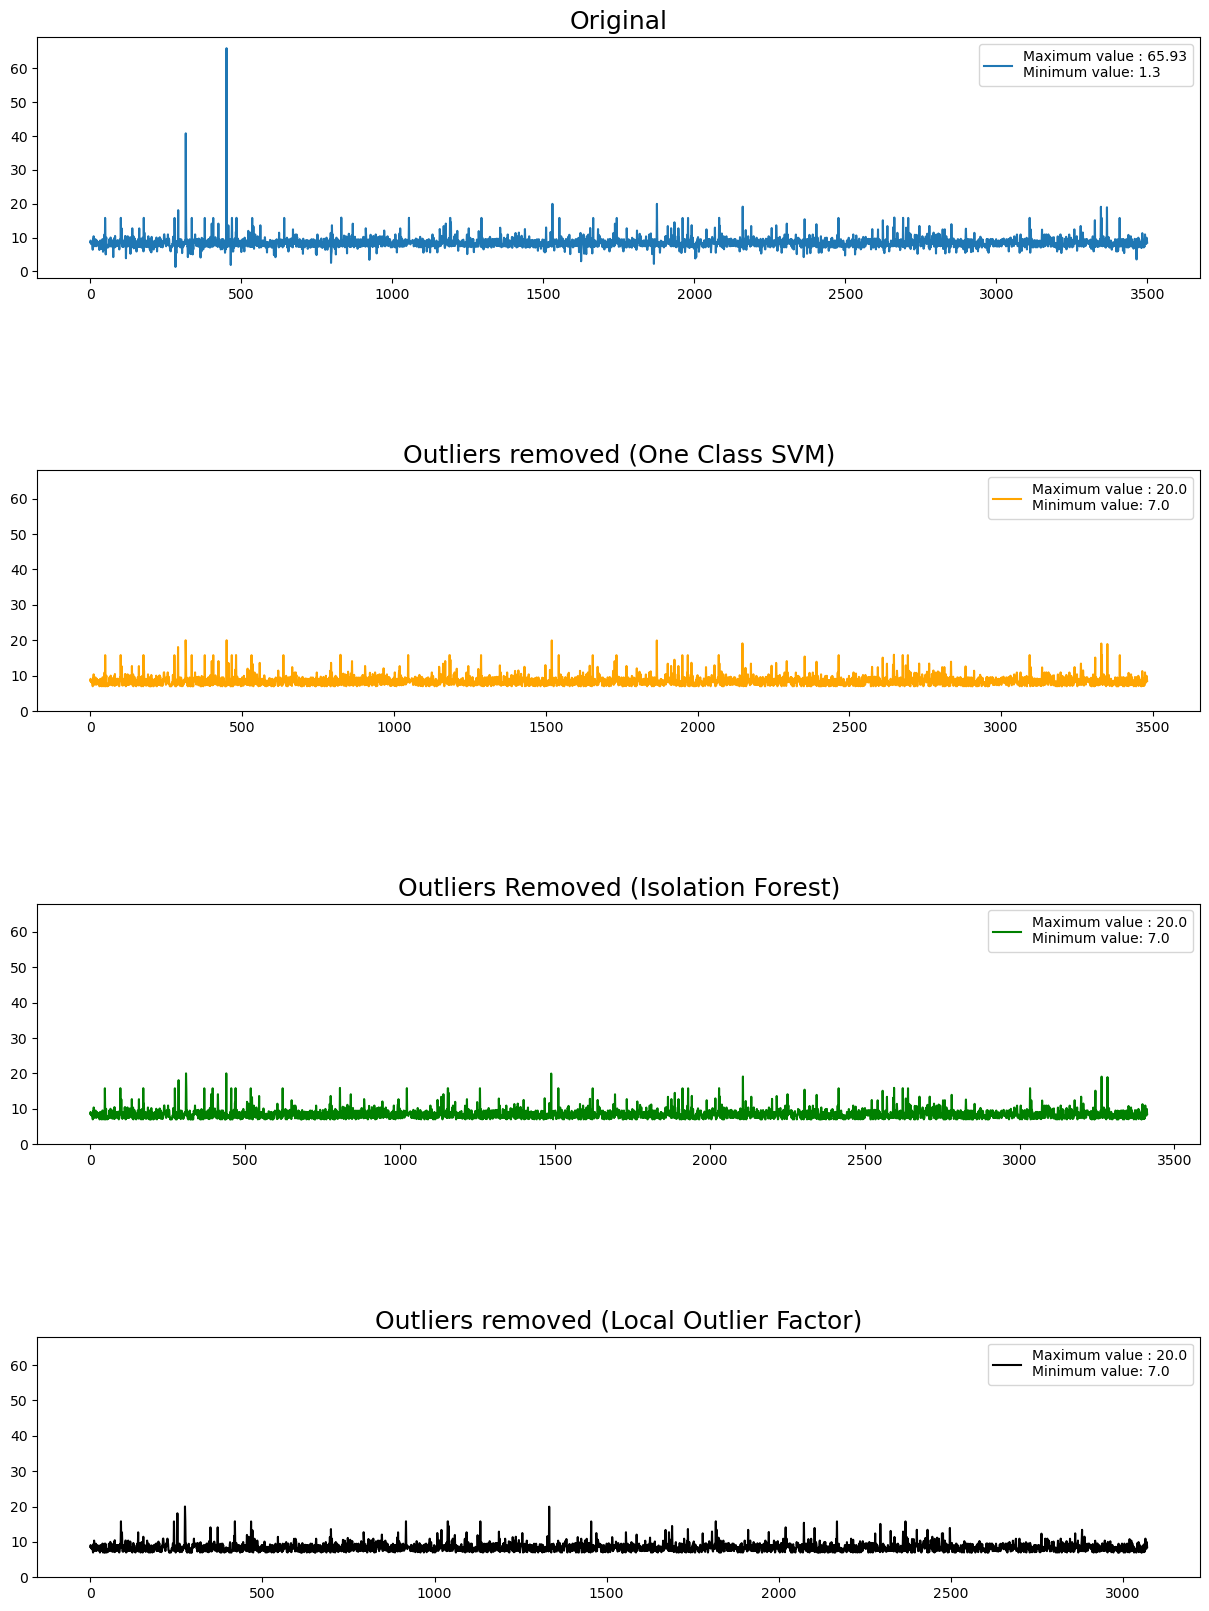

In [10]:
fig, axs = plt.subplots(4)
fig.subplots_adjust(hspace = 0.8)

axs[0].set_title('Original', fontsize = 18)
axs[0].plot(y, label = f'Maximum value : {max(y)}\nMinimum value: {min(y)}')
axs[0].legend()

axs[2].set_title('Outliers Removed (Isolation Forest)', fontsize = 18)
axs[2].set_ylim(0, 68)
axs[2].plot(Y_ISO, color = 'green', label = f'Maximum value : {max(Y_ISO)}\nMinimum value: {min(Y_ISO)}')
axs[2].legend()

axs[1].set_title('Outliers removed (One Class SVM)', fontsize = 18)
axs[1].set_ylim(0, 68)
axs[1].plot(Y_SVM, color = 'orange', label = f'Maximum value : {max(Y_SVM)}\nMinimum value: {min(Y_SVM)}')
axs[1].legend()

axs[3].set_title('Outliers removed (Local Outlier Factor)', fontsize = 18)
axs[3].set_ylim(0, 68)
axs[3].plot(Y_LOF, color = 'black', label = f'Maximum value : {max(Y_LOF)}\nMinimum value: {min(Y_LOF)}')
axs[3].legend()

In [11]:
X_final, y_final = data_final.drop('target', axis = 1), data_final.target

## Feature Selection

In [12]:
rf.fit(X_final, y_final)

imp = pd.DataFrame({'importances': rf.feature_importances_}, index = X_final.columns).sort_values(by = 'importances', ascending = False)

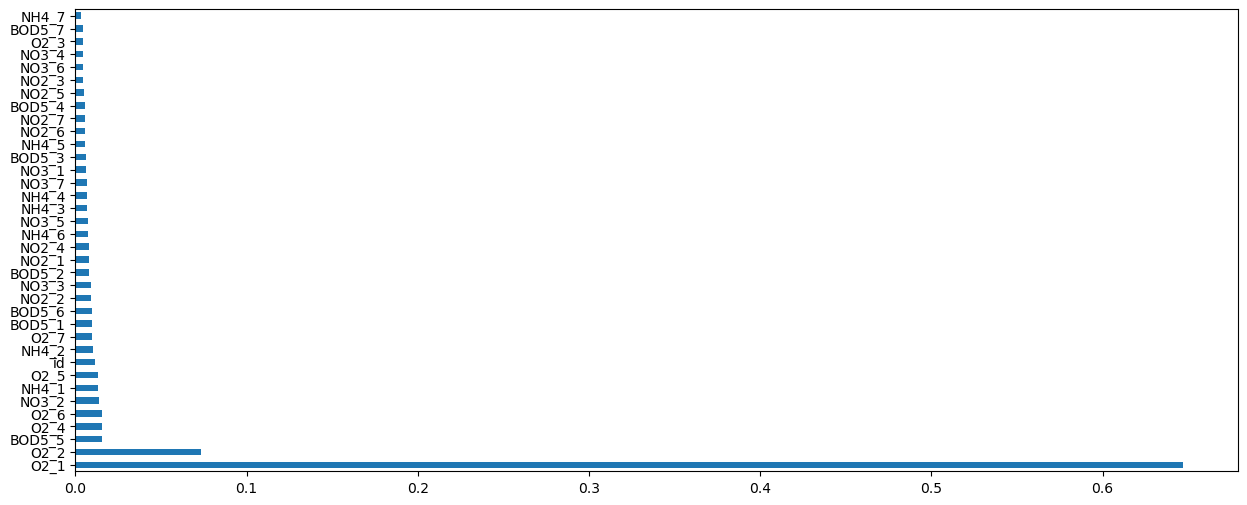

In [13]:
imp.plot(figsize = (15, 6), kind = 'barh')\
.get_legend().remove()

In [14]:
selected_features = [
    'O2_1', 
    'O2_2',
    'BOD5_5'
]

# kf = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 0)
scores = cross_val_score(rf, 
                         X_final[selected_features],
                         y_final,
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

print(f'[ENSEMBLE + FS + CLIPPING_7_20] --> RMSE Mean: {scores.mean()}, Standard Deviation: {scores.std()}')

[ENSEMBLE + FS + CLIPPING_7_20] --> RMSE Mean: -0.9214947902659292, Standard Deviation: 0.0764035067468917


## Trick

In [15]:
# Trick from https://www.kaggle.com/competitions/playground-series-s3e21/discussion/434519

bad_labels = [2365, 1089, 1936, 1680, 211]
data_final = data_final[~data_final['id'].isin(bad_labels)]

In [16]:
for column in X.columns:
    if column not in selected_features:
        data_final[column] = 0        

## Submission

In [17]:
submission = data_final.reset_index(drop = True).copy()

submission.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.645,0,0
1,0,9.10,13.533,40.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.725,0,0
2,0,8.21,3.710,5.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.750,0,0
3,0,8.39,8.700,8.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.670,0,0
4,0,8.07,8.050,8.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.400,0,0


In [18]:
submission.to_csv('submission.csv', index = False)